In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
df = pd.read_csv("ml_data.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'ml_data.csv'

In [ ]:
df = pd.read_csv("ml_data.csv")
df = df.sort_values(by='time_of_day')    
df= df.drop(columns=["Unnamed: 0", "time_of_day"])

df

,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,minute,category_broken clouds,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,0,30,30,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
1,34,40,6,8,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
2,0,30,30,8,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
3,6,30,24,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
4,23,23,0,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490185,26,30,4,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False
490186,27,35,8,5,4.12,3,20,22,49,False,...,True,False,False,False,False,False,False,False,False,False
490187,27,40,13,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False
490188,37,40,3,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

df


,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,minute,category_broken clouds,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,0,30,30,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
1,34,40,6,8,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
2,0,30,30,8,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
3,6,30,24,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
4,23,23,0,7,9.77,2,25,15,3,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490185,26,30,4,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False
490186,27,35,8,5,4.12,3,20,22,49,False,...,True,False,False,False,False,False,False,False,False,False
490187,27,40,13,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False
490188,37,40,3,6,4.12,3,20,22,49,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()


In [ ]:
y = load_airline()
y[2:]

Period
1949-03    132.0
1949-04    129.0
1949-05    121.0
1949-06    135.0
1949-07    148.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 142, dtype: float64

In [ ]:


y = df['available_bikes']

y

0         30
1          6
2         30
3         24
4          0
          ..
490185     4
490186     8
490187    13
490188     3
490189     0
Name: available_bikes, Length: 490190, dtype: int64

In [ ]:
"""X = df.drop(columns=['available_bikes'])  # Features
y = df['available_bikes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)"""

""""y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)""""


In [ ]:
train_set, test_set= np.split(df, [int(.20 *len(df))])
X_train = train_set.drop(columns=['available_bikes',"available_bike_stands"])
y_train = train_set['available_bikes']  
X_test = test_set.drop(columns=['available_bikes',"available_bike_stands"])
y_test = test_set['available_bikes'] 



c:\Users\carlo\anaconda3\envs\comp30830_flask\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=5)


working2 = model.fit(X_train, y_train)

C:\Users\carlo\AppData\Local\Temp\ipykernel_11312\3587295084.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['available_bikes'], shade=True)


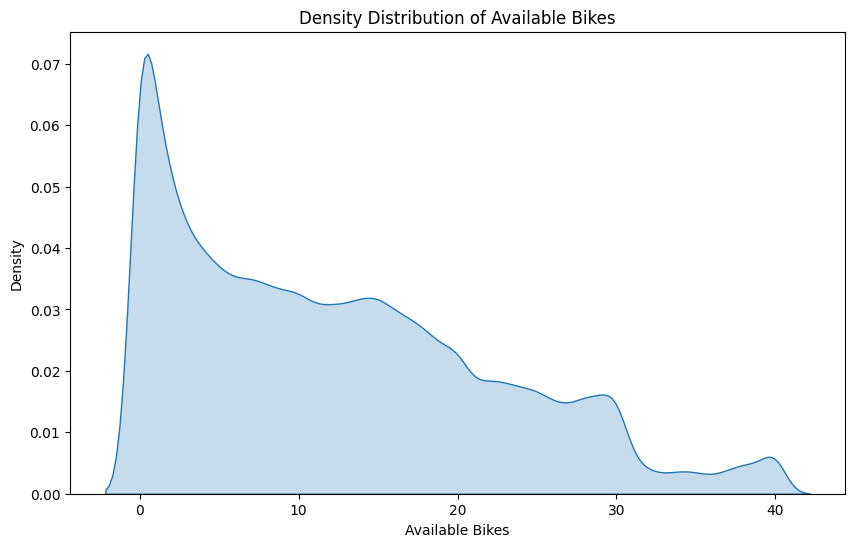

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame containing the predictor variable 'available_bikes'
# Replace df with your actual DataFrame name

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['available_bikes'], shade=True)
plt.title('Density Distribution of Available Bikes')
plt.xlabel('Available Bikes')
plt.ylabel('Density')
plt.show()


In [ ]:
result = working2.predict(X_test)

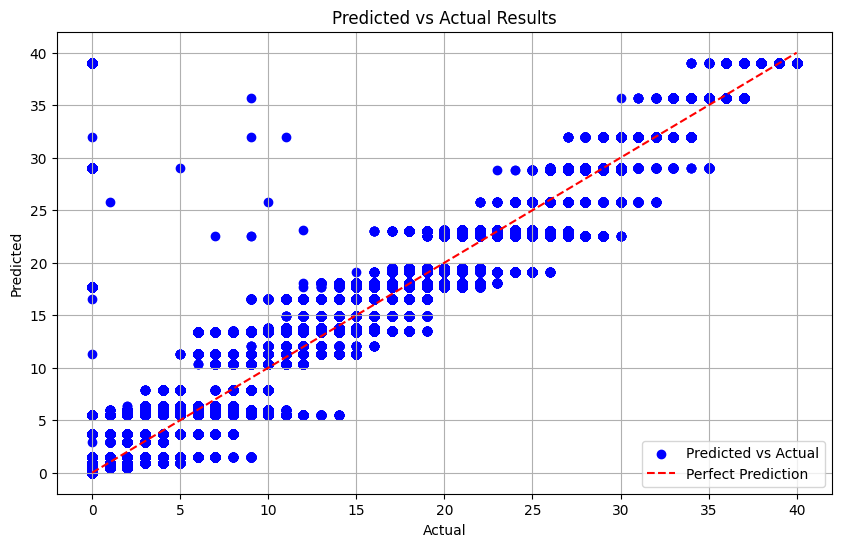

Adjusted R-squared (R²_adj): 0.94358996563336
Mean Absolute Error (MAE): 1.395027012079228
Mean Squared Error (MSE): 5.646409675358876
Root Mean Squared Error (RMSE): 2.376217514319528
R-squared (R²): 0.9436096727734877


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test contains the actual target values and result contains the predicted values
# Replace y_test and result with your actual variables

# Plot predicted vs. actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, result, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, result)
mse = mean_squared_error(y_test, result)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, result)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - 137 - 1)

print("Adjusted R-squared (R²_adj):", adjusted_r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


In [ ]:
len(result)

392152

In [ ]:
X_test_plot = X_test[X_test['category_110'] == True]
y_test_plot = y_test[X_test_plot.index]
result_plot = pd.Series(result, index=X_test.index)
result_plot = result_plot[X_test_plot.index]

result_plot

98148     22.978410
98152     22.978410
98287     22.978410
98410     22.978410
98536     22.978410
            ...    
489665     6.331792
489761    10.384784
489896    10.384784
490032    10.384784
490183    10.384784
Length: 3222, dtype: float64

C:\Users\carlo\AppData\Local\Temp\ipykernel_11312\1001177757.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_test_plot["day"], y=y_test_plot, marker='x', markersize=5, palette='colorblind', linestyle='--')
C:\Users\carlo\AppData\Local\Temp\ipykernel_11312\1001177757.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=X_test_plot["day"], y=result_plot, marker='x', markersize=5, palette='colorblind', linestyle='--')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


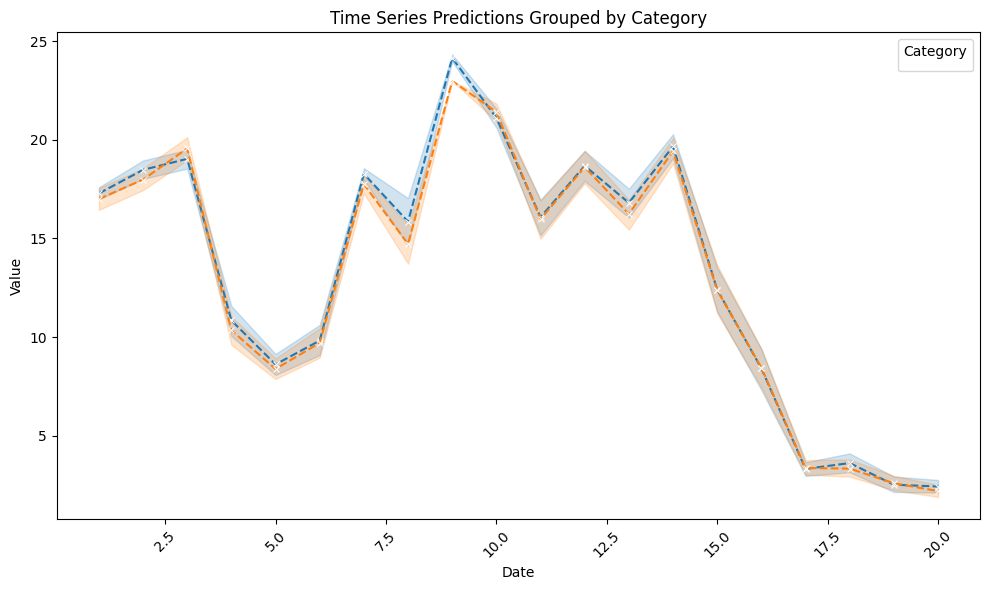

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dates' contains the date values corresponding to your actual and predicted data points
# 'y_test' and 'predicted_values' contain the actual and predicted values respectively
# 'categories' contains the category labels for grouping

# Combine the actual, predicted, and category data into a DataFrame
import pandas as pd


# Plot the time series predictions grouped by category
plt.figure(figsize=(10, 6))
sns.lineplot(x=X_test_plot["day"], y=y_test_plot, marker='x', markersize=5, palette='colorblind', linestyle='--')

sns.lineplot(x=X_test_plot["day"], y=result_plot, marker='x', markersize=5, palette='colorblind', linestyle='--')
plt.title('Time Series Predictions Grouped by Category')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()
